<a href="https://colab.research.google.com/github/katiesalas/data_analytics_2/blob/main/Unit_4_ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.
## Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X ,capital X (designating matrix)

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [ ]:
#imports most used analysis and visualization libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
load_boston()	Load and return the boston house-prices dataset (regression).
load_iris()	Load and return the iris dataset (classification).
load_diabetes()	Load and return the diabetes dataset (regression).

In [ ]:
#below we import the data to analyze and assign it a name that makes it easier to call upon, for this example we use df, which = data frame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [ ]:
df.head()   #prints the first 5 elements of the data set, tail is the last 5

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
 df.columns    #displays the column names and type

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  #drops column = .drop, we see that the unnamed column is superfluous
#inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated.
#when inplace = False , which is the default, then the operation is performed and it returns a copy of the object. 
#you then need to save it to something.

In [ ]:
df.head()   #displays first 5 rows, this time without the dropped column

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
type(df)    #prints the type, df is a pandas data frame

pandas.core.frame.DataFrame

In [ ]:
ad_data = df    #reassigns data frame (df) to a name that is more descriptive

In [ ]:
print (ad_data)   #print prints! But when it is a long df it shows head and tail and shape

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


In [ ]:
#if in plottingwe see that a few of data features are not standard, we can use:
#StandardScaler = helps to normalise the data within a particular range (to be around mean=0,std=1). 
#it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

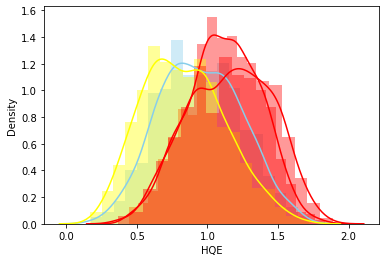

In [ ]:
#sns.distplot plots distribution, below we print 3 of the columns, can manipulate color, size, etc
sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")



#Standardization and Normalization of data

https://benalexkeen.com/feature-scaling-with-scikit-learn/

 Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization or standardization. 

There are 4 types of scaling in sicikit

 StandardScaler, MinMaxScaler, RobustScaler, Normalizer
Two most common used is Normalization (help to scale your features 0 to 1 ) and (standarization , Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1) 

we are standardizing the data now   


 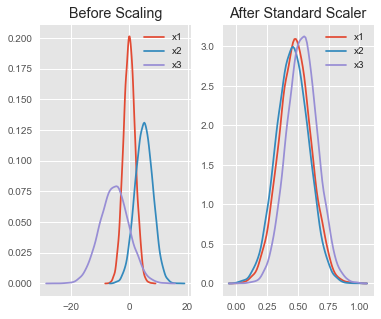


In [ ]:
#imports StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
#redefines scaler, call it whatever you like, scalar is as descriptive as you can get
scalar = StandardScaler()

In [ ]:
#.fit() calculates the parameters (𝜇,std,var) when StandardScaler used, we are dropping the target class bc that is the outcome

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#transformed data
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))


In [ ]:
#applies dataframe on all columns of scaled data, renaming the scaled data set, [:-1] means from the beginning all the way to the end
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
X = df.drop('TARGET CLASS',axis=1).values   #X is the input, this creates a new variable for it


In [ ]:

# we can see now the scaled values
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

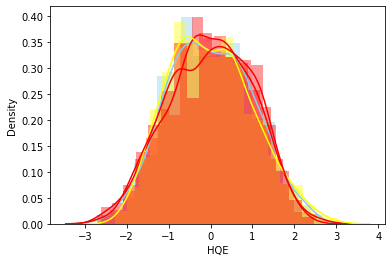

In [ ]:
# after scaling let's compare the columns, visualization after scaling, we see that is more uniform and closer to the mean
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## scikit-learn 4-step modeling pattern


Step 1 train and test your model
Import the library


With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test
Now

1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression



In [ ]:
from sklearn.model_selection import train_test_split    #imports more from sklearn for prediction

#the code below is the standard for splitting data for testing and predicting, in this case, scaled features(input) 
#and the target class(output), test size =.3 which means 30% of data, so train size is 70%

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [ ]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

print ("y_test: ", y_test)

X_train:  [[ 0.47005882 -0.72316829  2.210923   ... -1.5984759   1.21483919
   0.25058364]
 [-0.07648263 -0.53093973 -1.0593043  ... -0.12347641  0.84926287
  -0.47430297]
 [ 0.54821581 -0.45737012 -1.83231202 ... -0.67404019 -0.32925607
  -1.39457191]
 ...
 [ 0.50871144 -0.50116641  1.07015057 ...  1.07978351 -1.50200883
   1.36467511]
 [-0.91924416 -0.09825576  0.80249573 ...  0.80261192 -1.6429345
  -1.00266799]
 [-0.45465423  1.37103342  0.21786116 ...  2.083538   -0.72331775
   0.18329331]]
y_train:  229    0
831    1
82     1
497    0
123    1
      ..
44     0
697    0
917    0
838    0
778    0
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  900    1
51     1
925    0
42     1
88     1
      ..
850    1
485    0
257    0
318    1
809    1
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier     #this imports the library for fit using the k, or neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)   #renaming to make it easier to call, the value k passed, n_neighbors = 1, means k = 1

In [ ]:
knn.fit(X_train,y_train)      #Curve fitting involves finding the optimal parameters to a function that maps examples of inputs to outputs.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predict = knn.predict(X_test)  #reassigning to predict for easier call, also apt name, X_test, must use x, bc that is the input

In [ ]:
#predict
#print (predict)
predict     #output of the matrix, True= 1, False= 0

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
#imports classification_report, confusion_matrix objects within sklearn.metrics, can import multiple funtions from sklearn at once with comma
from sklearn.metrics import  classification_report, confusion_matrix

In [ ]:
#confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
#where N is the number of target classes, the matrix compares the actual target values (output) with those predicted
print(confusion_matrix(y_test,predict))

[[121  19]
 [ 20 140]]


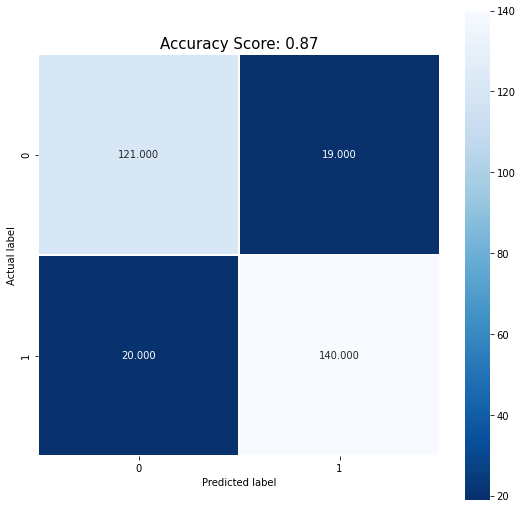

In [ ]:
plt.figure(figsize=(9,9))     #heatmap of conf matrix is more visual presentation, plt.figure adjust the size, the default is smaller
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# above after the matrix input is adjustments for color, size, etc
plt.ylabel('Actual label');
plt.xlabel('Predicted label');      #labels axis
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))    #concatenating with whatever the calculation for the score is
plt.title(all_sample_title, size = 15);                                       #labeling title using concatenation from above

In [ ]:
#Precision = What percent of your predictions were correct?
#Recall = What percent of the positive cases did you catch?
#F1 score = What percent of positive predictions were correct?
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
#Recall is the ability of a classifier to find all positive instances.

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       140
           1       0.88      0.88      0.88       160

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
#sklearn metrics module implements several loss, score, and utility functions to measure classification performance
#calculating the acuracy score (y_test vs y_predict)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

[0.87]


# Repeat above steps for K = 5, see what happens with Accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)     #here is where we change the k to = 5 (n_neighbors = k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predict = knn.predict(X_test)
print(confusion_matrix(y_test,predict))

[[131   9]
 [ 13 147]]


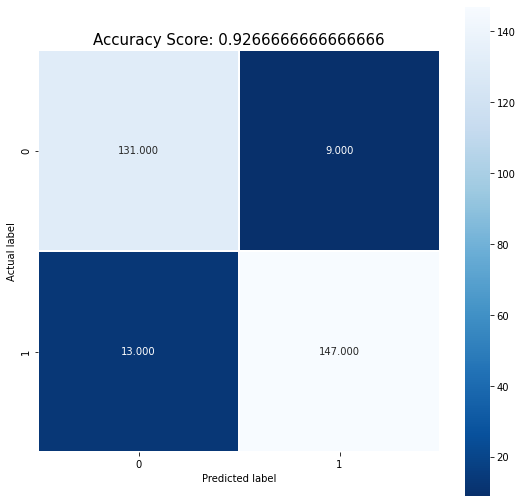

In [ ]:
plt.figure(figsize=(9,9))     #heatmap of conf matrix is more visual presentation, plt.figure adjust the size, the default is smaller
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# above after the matrix input is adjustments for color, size, etc
plt.ylabel('Actual label');
plt.xlabel('Predicted label');      #labels axis
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))    #concatenating with whatever the calculation for the score is
plt.title(all_sample_title, size = 15);      

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       140
           1       0.94      0.92      0.93       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

[0.9266666666666666]


# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [ ]:
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [ ]:
#sklearn metrics module implements several loss, score, and utility functions to measure classification performance
from sklearn import metrics

In [ ]:
score =[]   #holds the values for the outcome

In [ ]:
#runs k from 1 to 39, passes the value of K to KNeighborsClassifier and calculates the accuracy score (y_test vs y_predect)
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred)) #output tested, and output predicted

print(score)

[0.87, 0.8933333333333333, 0.92, 0.92, 0.9266666666666666, 0.9233333333333333, 0.94, 0.94, 0.94, 0.9266666666666666, 0.9466666666666667, 0.9366666666666666, 0.9466666666666667, 0.9333333333333333, 0.9366666666666666, 0.93, 0.9366666666666666, 0.94, 0.94, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9366666666666666, 0.94, 0.94, 0.9466666666666667, 0.9466666666666667, 0.95, 0.9466666666666667, 0.95, 0.9466666666666667, 0.95, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.95, 0.95, 0.9466666666666667, 0.9533333333333334]


Text(0, 0.5, 'Testing Accuracy')

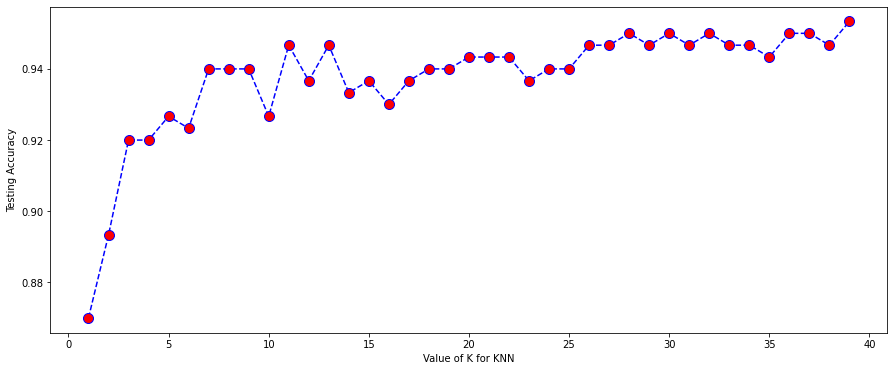

In [ ]:
plt.figure(figsize=(15,6))     #(height, length)
plt.plot(range(1,40),score, color='blue',linestyle='dashed',  #score = variable that is being plotted
         marker='o',markerfacecolor='red', markersize=10)     #general manipulation of visuals
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


#Error Rate and K value

In [ ]:
error_rate = []
#might take some time, lots of math
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.04666666666666667 at K = 38
Maximum error:- 0.13 at K = 0


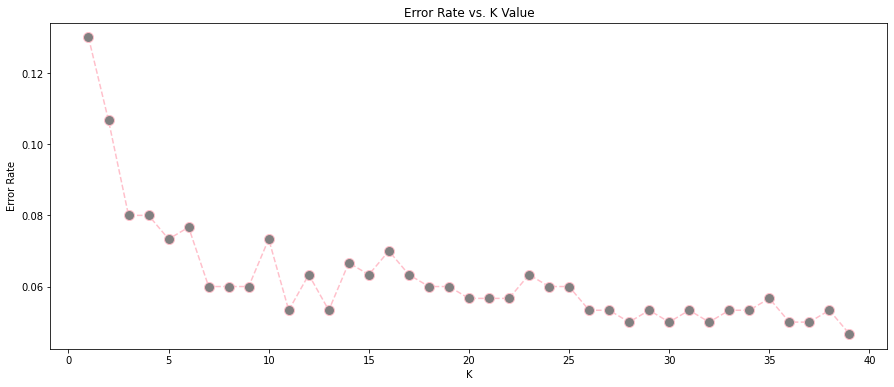

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) #gives minumum value of errors
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate))) #gives maximum value at different K's
#print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Conclusion

Before we scale the data, the information is not consistent. After using the scalar function, the data is much more uniform and the info and the charts align to the mean and with eachother. After splitting the data between testing and training info we are able to use predictive functions to see how well we can predict the output, the target class. In this case the target case is binary, 0 and 1 or no and yes. We run the classification report and make a confusion matrix to better understand and visualize our prediction. The KNN (K-Nearest Neighbor) algorithm assumes that similar things exist in close proximity. We use this algorithm for better accuracy. For the first confusion matrix, we choose our K, or number of neighboring data, to be 1, and the second matrix, our K is equal to 5. We know that increasing the K does not always mean more accuracy. However in this case, it does, from 87% to 93%.  When the K is 5 our F1 score improves as well, we go from 88 to 93, which means we have a higher chance for true positives, meaning we guessed yes and it was yes. 
In the last two sections we test for accuracy by running the data and adjusting the K from 1 to 39. When we plot the data the accuracy increases. When the error rate is checked similiarly and plotted we see that it decreases. 